In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("data/exemple1.csv")  # Replace "your_dataset.csv" with the actual file path


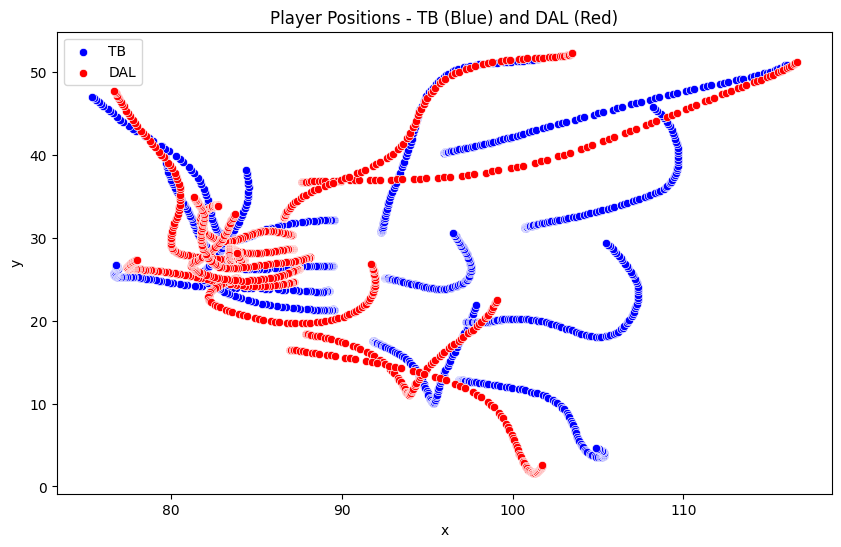

In [3]:
# Spatial Analysis with Different Colors for TB and DAL
plt.figure(figsize=(10, 6))

# Plot TB team in blue
sns.scatterplot(x='x', y='y', data=data[data['team'] == 'TB'], color='blue', label='TB')

# Plot DAL team in red
sns.scatterplot(x='x', y='y', data=data[data['team'] == 'DAL'], color='red', label='DAL')

plt.title('Player Positions - TB (Blue) and DAL (Red)')
plt.legend()
plt.show()


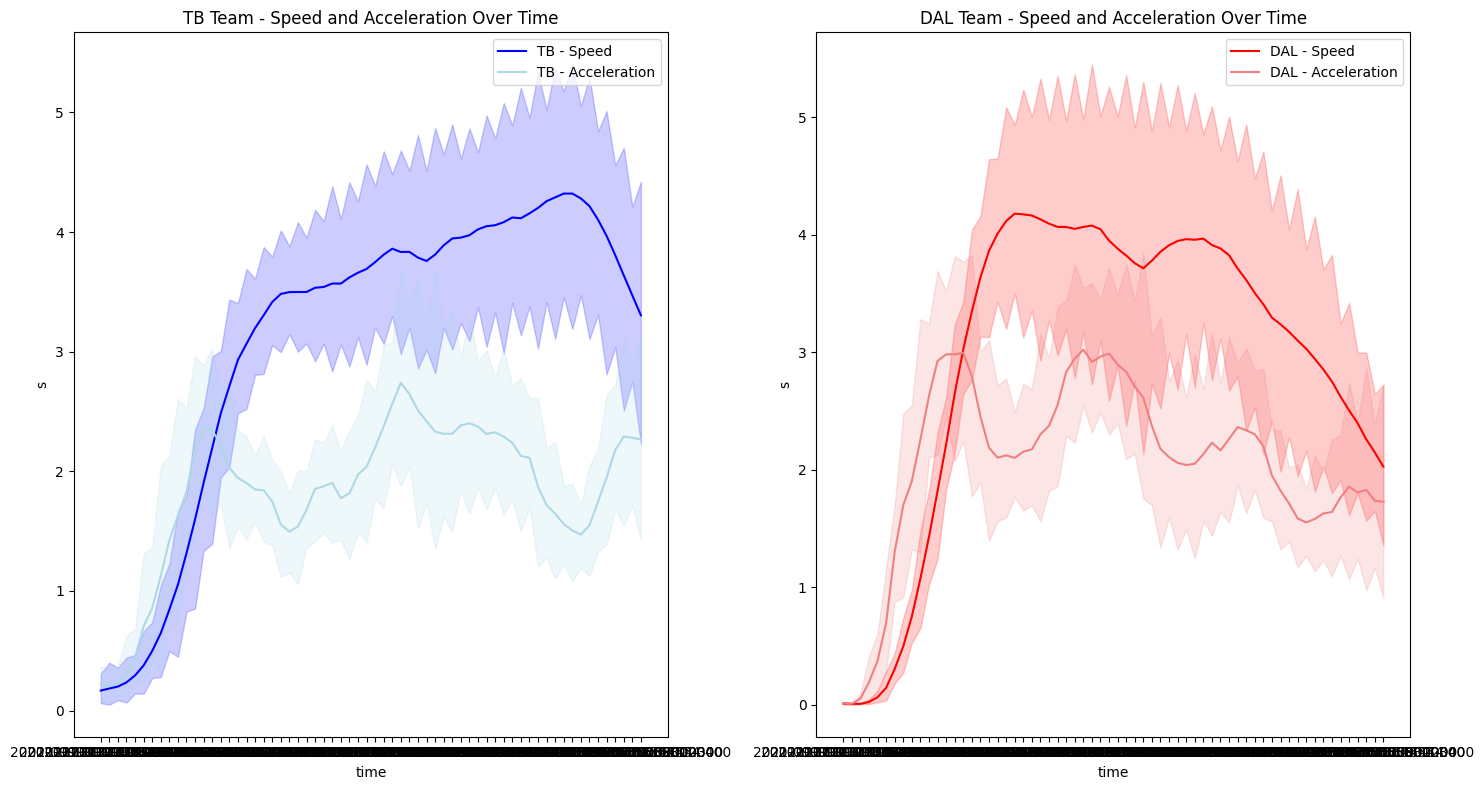

In [4]:
# Movement Analysis with Subplots for TB and DAL Teams
plt.figure(figsize=(15, 8))

# Plot speed for TB in Subplot 1
plt.subplot(1, 2, 1)
sns.lineplot(x='time', y='s', data=data[data['team'] == 'TB'], label='TB - Speed', color='blue')
sns.lineplot(x='time', y='a', data=data[data['team'] == 'TB'], label='TB - Acceleration', color='lightblue')
plt.title('TB Team - Speed and Acceleration Over Time')
plt.legend()

# Plot speed for DAL in Subplot 2
plt.subplot(1, 2, 2)
sns.lineplot(x='time', y='s', data=data[data['team'] == 'DAL'], label='DAL - Speed', color='red')
sns.lineplot(x='time', y='a', data=data[data['team'] == 'DAL'], label='DAL - Acceleration', color='lightcoral')
plt.title('DAL Team - Speed and Acceleration Over Time')
plt.legend()

plt.tight_layout()
plt.show()


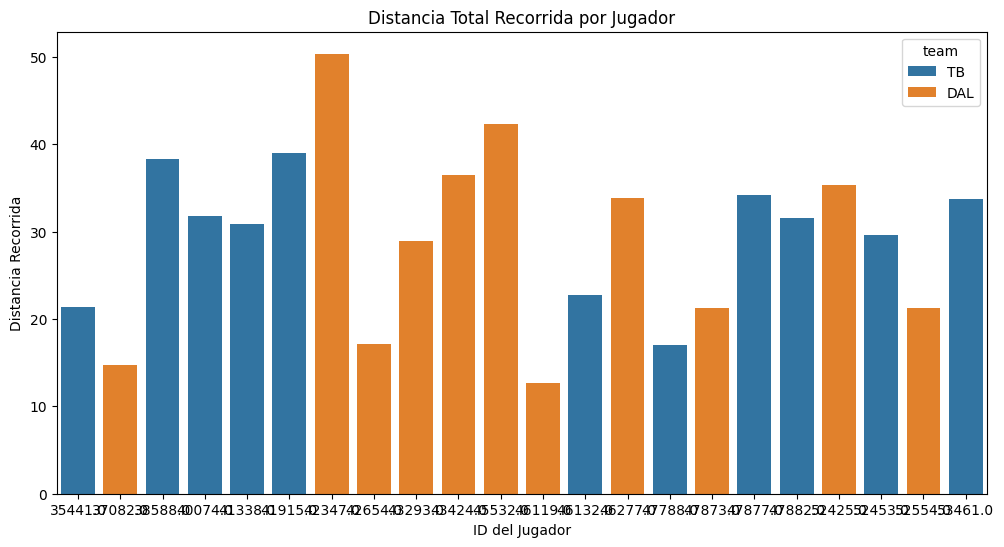

In [5]:
# Calcula la distancia total recorrida por cada jugador
total_distance = data.groupby(['nflId', 'team'])['dis'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='nflId', y='dis', hue='team', data=total_distance)
plt.title('Distancia Total Recorrida por Jugador')
plt.xlabel('ID del Jugador')
plt.ylabel('Distancia Recorrida')
plt.show()
    

In [36]:
data

,Unnamed: 0,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event,x_interp,y_interp,direction_change
0,39974,2021090900,2279,35441.0,1,2021-09-10T01:58:48.100,93.0,TB,right,89.220,23.640,0.11,0.06,0.01,287.40,89.48,NaN,NaN,NaN,NaN
1,39974,2021090900,2279,35441.0,2,2021-09-10T01:58:48.100,93.0,TB,right,89.235,23.625,0.11,0.06,0.01,287.40,89.48,NaN,NaN,NaN,0.00
2,39975,2021090900,2279,35441.0,3,2021-09-10T01:58:48.200,93.0,TB,right,89.250,23.610,0.15,0.01,0.03,287.40,107.50,NaN,NaN,NaN,18.02
3,39976,2021090900,2279,35441.0,4,2021-09-10T01:58:48.300,93.0,TB,right,89.230,23.570,0.16,0.13,0.05,288.78,145.22,NaN,NaN,NaN,37.72
4,39976,2021090900,2279,35441.0,5,2021-09-10T01:58:48.300,93.0,TB,right,89.220,23.565,0.16,0.13,0.05,288.78,145.22,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,41442,2021090900,2279,NaN,92,2021-09-10T01:58:54.100,NaN,football,right,76.875,46.730,4.15,3.08,0.42,NaN,NaN,NaN,76.94,46.54,NaN
2204,41443,2021090900,2279,NaN,93,2021-09-10T01:58:54.200,NaN,football,right,76.810,46.920,3.86,3.10,0.40,NaN,NaN,NaN,76.81,46.92,NaN
2205,41444,2021090900,2279,NaN,94,2021-09-10T01:58:54.300,NaN,football,right,76.680,47.160,3.07,3.89,0.27,NaN,NaN,NaN,76.68,47.16,NaN
2206,41444,2021090900,2279,NaN,95,2021-09-10T01:58:54.300,NaN,football,right,76.625,47.270,3.07,3.89,0.27,NaN,NaN,NaN,76.68,47.16,NaN


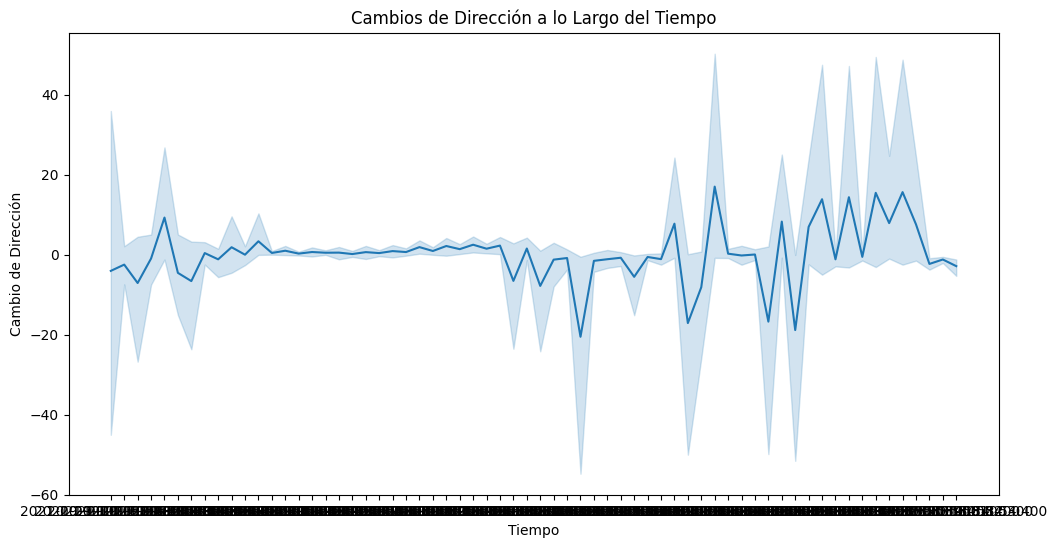

In [6]:
# Calcula cambios de dirección
data['direction_change'] = data['dir'].diff()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='direction_change', data=data)
plt.title('Cambios de Dirección a lo Largo del Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Cambio de Dirección')
plt.show()


In [40]:
import numpy as np
def calcular_distancia(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def distancia_recorrida_por_jugador(dataframe):
    teams = dataframe['team'].dropna().unique()
    distancias_Team = []
    for t in teams:
        jugadores = dataframe[dataframe['team'] == t]['nflId'].unique()
        distancias_por_jugador = {}

        for jugador in jugadores:
            jugador_data = dataframe[dataframe['nflId'] == jugador]
            distancia_total = 0.0

            for i in range(1, len(jugador_data)):
                x1, y1 = jugador_data.iloc[i - 1]['x'], jugador_data.iloc[i - 1]['y']
                x2, y2 = jugador_data.iloc[i]['x'], jugador_data.iloc[i]['y']
                distancia_total += calcular_distancia(x1, y1, x2, y2)

            distancias_por_jugador[jugador] = distancia_total

        distancias_Team.append(distancias_por_jugador)
    return distancias_Team[0], distancias_Team[1]

In [41]:
team1, team2 = distancia_recorrida_por_jugador(data)

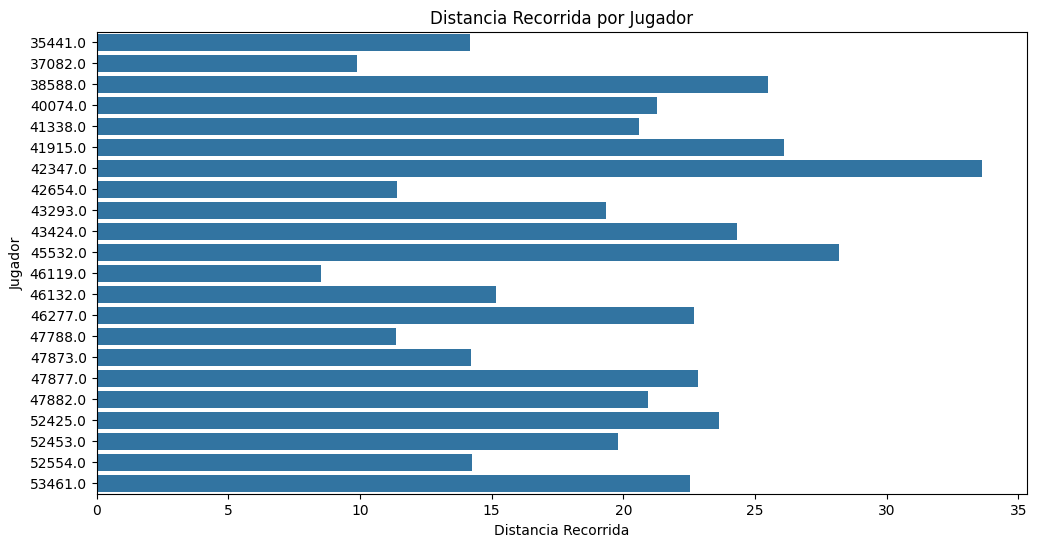

In [35]:
distancias_df = pd.DataFrame(list(distancias1.items()), columns=['Jugador', 'Distancia'])

# Ordenar el DataFrame por la columna de distancia
distancias_df = distancias_df.sort_values(by='Distancia', ascending=False)

# Crear el diagrama de barras horizontales
plt.figure(figsize=(12, 6))
sns.barplot(x='Distancia', y='Jugador', data=distancias_df, orient='h')
plt.xlabel('Distancia Recorrida')
plt.ylabel('Jugador')
plt.title('Distancia Recorrida por Jugador')
plt.show()


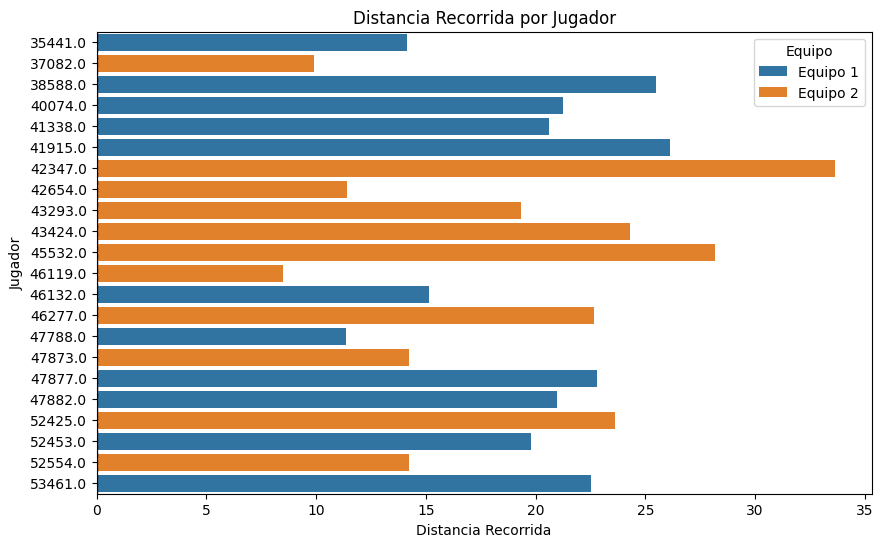

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes una lista con dos diccionarios para cada equipo
# team1 = {'Jugador1': distancia1, 'Jugador2': distancia2, ...}
# team2 = {'JugadorA': distanciaA, 'JugadorB': distanciaB, ...}

# Crear DataFrames para cada equipo
df_team1 = pd.DataFrame(list(team1.items()), columns=['Jugador', 'Distancia'])
df_team2 = pd.DataFrame(list(team2.items()), columns=['Jugador', 'Distancia'])

# Agregar una columna 'Equipo' para identificar a qué equipo pertenece cada jugador
df_team1['Equipo'] = 'Equipo 1'
df_team2['Equipo'] = 'Equipo 2'
df_team2['Distancia'] = df_team2['Distancia']*-1

# Concatenar los DataFrames
df_combined = pd.concat([df_team1, df_team2])

# Asignar colores a cada equipo
colores = {'Equipo 1': 'skyblue', 'Equipo 2': 'orange'}

# Ordenar el DataFrame combinado por la columna de distancia
df_combined = df_combined.sort_values(by='Distancia', ascending=True)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x='Distancia', y='Jugador', data=df_combined, orient='h', hue='Equipo')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Línea en el valor 0
plt.xlabel('Distancia Recorrida')
plt.ylabel('Jugador')
plt.title('Distancia Recorrida por Jugador')
plt.show()
